In [1]:
import doctest
import math

import IPython
import IPython.display as ipd

import spb
import sympy as sp
import sympy.vector as sv

HALF = sp.S.Half
PI = sp.pi
E = sp.exp
POSITIVEINFINITY = sp.S.Infinity


def vector(F: sv.CoordSys3D, rx, ry, rz=0) -> sv.Vector:
    """
    Create a vector in a specified reference frame.

    Args:
        F (sv.CoordSys3D): The reference frame in which the vector is defined.
        rx (float): The coefficient of the x-axis vector component.
        ry (float): The coefficient of the y-axis vector component.
        rz (float, optional): The coefficient of the z-axis vector component (default: 0).

    Returns:
        sv.Vector: The vector composed of the specified components in the given reference frame.

    Examples:
        >>> N = sv.CoordSys3D('N')
        >>> vector(N, 1, 0, 0)
        N.i

        >>> vector(N, 0, 1, 0)
        N.j

        >>> vector(N, 0, 0, 1)
        N.k

        >>> vector(N, 1, 2)
        N.i + 2*N.j

        >>> vector(N, 1, 2, 3)
        N.i + 2*N.j + 3*N.k

        >>> vector(N, 5.0, 5.1, 7.7)
        5.0*N.i + 5.1*N.j + 7.7*N.k

        >>> vector(N, 1, 2, 3)
        N.i + 2*N.j + 3*N.k
    """
    return rx * F.i + ry * F.j + rz * F.k


def vector_cos(F: sv.CoordSys3D, magnitude, theta, phi, psi=sp.pi / 2) -> sv.Vector:
    """
    Create a vector with components defined by cosine values in a specified reference frame.

    Args:
        F (sv.CoordSys3D): The reference frame in which the vector is defined.
        magnitude (float): The magnitude of the vector.
        theta (float): The angle (in radians) between the vector and the x-axis.
        phi (float): The angle (in radians) between the vector and the y-axis.
        psi (float, optional): The angle (in radians) between the
            vector and the z-axis (default: pi/2).

    Returns:
        sv.Vector: The vector with components determined by the cosine
        values in the given reference frame.

    Examples:
        >>> N = sv.CoordSys3D('N')
        >>> vector_cos(N, 1, PI/2, sp.Float(0))
        N.j

        >>> vector_cos(N, 1, 0, PI/2)
        N.i

        >>> vector_cos(N, sp.sqrt(2), PI/4, PI/4).simplify()
        N.i + N.j

        >>> vector_cos(N, 1, PI/2, 0)
        N.j

        >>> vector_cos(N, 41, PI/2 + PI/4, 2*PI/3, PI/3)
        (-41*sqrt(2)/2)*N.i + (-41/2)*N.j + 41/2*N.k

        >>> n = sp.sqrt(93)
        >>> vector_cos(N, n, 5/n, 2/n, 8/n)
        (sqrt(93)*cos(5*sqrt(93)/93))*N.i + (sqrt(93)*cos(2*sqrt(93)/93))*N.j + (sqrt(93)*cos(8*sqrt(93)/93))*N.k
    """

    return magnitude * (sp.cos(theta) * F.i + sp.cos(phi) * F.j + sp.cos(psi) * F.k)


def create_3d_components(*args):
    """
    Create 3D components for given symbols.

    Args:
        *args (str): Variable names for which 3D components are to be created.

    Returns:
        list: A list containing 3D component symbols for each input variable.

    Examples:
        >>> create_3d_components('a')
        [(a_x, a_y, a_z)]

        >>> create_3d_components('a', 'b')
        [(a_x, a_y, a_z), (b_x, b_y, b_z)]

    """
    return [sp.symbols(f"{ch}" "_x:z", real=True) for ch in args]


def create_vectors(frame: sv.CoordSys3D, *args) -> list:
    """
    Create a list of vectors in a specified reference frame.

    This function takes a reference frame and multiple sets of components as arguments
    and returns a list of vectors created from these components in the given reference frame.

    Args:
        frame (sv.CoordSys3D): The reference frame in which the vectors are defined.
        *args: Variable-length argument list containing sets of vector components.

    Returns:
        list: A list of vectors composed of the specified components in the given reference frame.

    Examples:
        >>> N = sv.CoordSys3D('N')
        >>> create_vectors(N, "a")
        [a_x*N.i + a_y*N.j + a_z*N.k]

        >>> create_vectors(N, "a", "b")
        [a_x*N.i + a_y*N.j + a_z*N.k, b_x*N.i + b_y*N.j + b_z*N.k]

    """
    return [vector(frame, *c) for c in create_3d_components(*args)]


def angle_between_two_vectors(frame: sv.CoordSys3D, v1: sv.Vector, v2: sv.Vector):
    """Smallest angle between two vectors

    Args:The reference frame in which the vectors are defined.
        v1 (sv.Vector): first vector
        v2 (sv.Vector): second vector

    Returns:
        Any: arcos of smallest angle between two vectors

        Examples:
        >>> N = sv.CoordSys3D('N')
        >>> a = 3*N.i + 4*N.j
        >>> b = 2*N.i - N.j
        >>> round(angle_between_two_vectors(N, a, b).evalf(), 4)
        0.1789

        >>> v1 = N.i
        >>> v2 = N.j
        >>> angle_between_two_vectors(N, v1, v2)
        0

        >>> v3 = N.i + N.j + N.k
        >>> angle_between_two_vectors(N, v1, v3)
        sqrt(3)/3

        >>> a = N.i + N.j
        >>> b = 2*N.i + 2*N.j
        >>> angle_between_two_vectors(N, a, b)
        1

        >>> a = 2*N.i - 4*N.j - 1*N.k
        >>> b = 5 * N.j +2*N.k
        >>> angle_between_two_vectors(N, a, b)
        -22*sqrt(609)/609

        >>> N = sv.CoordSys3D('N')
        >>> vec_A, vec_B = 5*N.i - 2*N.j + 4*N.k, 3*N.i + 1*N.j + 7*N.k
        >>> cos_angle = angle_between_two_vectors(N, vec_A, vec_B)
        >>> round(math.degrees(sp.acos(cos_angle)), 1) # doctest: +NORMALIZE_WHITESPACE
        37.3

    """
    return sv.dot(v1, v2) / v1.magnitude() / v2.magnitude()


def cosine_of_angle_between_vectors(
    v: sv.CoordSys3D, u: sv.CoordSys3D, theta: sp.Symbol
) -> sp.Symbol:
    """Using the cosine rule determine the angle between vectors.

    Args:
        v (sv.CoordSys3D): first vector
        u (sv.CoordSys3D): second vector
        theta (sp.Symbol): symbol for angle between two vectors

    Returns:
        sp.Symbol: cosine of angle between two vectors

    Examples:
        >>> N = sv.CoordSys3D('N')
        >>> alpha = sp.symbols("alpha", real=True)
        >>> a, b = N.i, N.j
        >>> sp.acos(cosine_of_angle_between_vectors(a, b, alpha))
        pi/2

        >>> N = sv.CoordSys3D('N')
        >>> alpha = sp.symbols("alpha", real=True)
        >>> a, b = N.i, N.i + N.j
        >>> sp.acos(cosine_of_angle_between_vectors(a, b, alpha))
        pi/4

        >>> N = sv.CoordSys3D('N')
        >>> alpha = sp.symbols("alpha", real=True)
        >>> a = vector_cos(N, 4, PI/12, PI*5/12)
        >>> b = vector_cos(N, 8, PI/4, PI/4)
        >>> sp.acos(cosine_of_angle_between_vectors(a, b, alpha))
        pi/6

    """

    cosine_rule = sp.Eq(
        ((v - u).magnitude()) ** 2,
        u.magnitude() ** 2
        + v.magnitude() ** 2
        - 2 * u.magnitude() * v.magnitude() * sp.cos(theta),
    )

    return sp.solve(cosine_rule, sp.cos(theta))[0].simplify()


def square_of_sine_of_angle_between_vectors(
    v: sv.CoordSys3D, u: sv.CoordSys3D, theta: sp.Symbol
) -> sp.Expr:
    """Find the square of the sine of angle between 2 vectors

    Args:
        v (sv.CoordSys3D): first vector
        u (sv.CoordSys3D): second vector
        theta (sp.Symbol): symbol for angle between two vectors

    Returns:
        sp.Expr: square of the sine of angle between 2 vectors

    Examples:
        >>> N = sv.CoordSys3D('N')
        >>> alpha = sp.symbols("alpha", real=True)
        >>> a, b = N.i, N.j
        >>> sq = square_of_sine_of_angle_between_vectors(a, b, alpha)
        >>> sq
        1

        N = sv.CoordSys3D('N')
        alpha = sp.symbols("alpha", real=True)
        a = vector_cos(N, 4, PI/12, PI*5/12)
        b = vector_cos(N, 8, PI/4, PI/4)
        square_of_sine_of_angle_between_vectors(a, b, theta)
        1/4

    """

    return 1 - cosine_of_angle_between_vectors(v, u, theta) ** 2


def laplacian(f: sp.Expr) -> sp.Expr:
    """Determine the Laplacian of an expression

    Args:
        f (sp.Expr): Expression fo determine the Laplacian

    Returns:
        sp.Expr: the Laplacian

    Examples:
    >>> N = sv.CoordSys3D("N")
    >>> f = N.x**2 + 3 * N.y**2 + 2 * N.x * N.y + 3 * N.x + 5
    >>> laplacian(f)
    8
    """

    nabla = sv.Del()
    return nabla.dot(nabla.gradient(f)).doit()


def print_aligned_latex_equations(*args):
    result = r"\\".join(
        [
            r"\begin{equation}",
            r"\begin{split}",
            *args,
            r"\nonumber",
            r"\end{split}",
            r"\end{equation}",
        ]
    )

    ipd.display(ipd.Math(rf"{result}"))

# Formulae

\begin{align*}
    \mathbf{a} \cdot \mathbf{b} &= 
    \Vert \mathbf{a} \Vert \Vert \mathbf{b} \Vert \cos(\theta)
    & \text{where $\theta$ is the angle between $ \mathbf{a}$ and $\mathbf{b}$} \\
    \mathbf{a} \cdot \mathbf{b} &= \mathbf{b} \cdot \mathbf{a} \\
    \mathbf{a} \times \mathbf{b} &\neq \mathbf{b} \times \mathbf{a} \\
    \mathbf{a} \times \mathbf{b} &= - \mathbf{b} \times \mathbf{a} \\
    \mathbf{a} + \mathbf{b} &= 
        \mathbf{b} + \mathbf{a} \\
    (\mathbf{a} + \mathbf{b}) + \mathbf{c} &= 
        \mathbf{a} + (\mathbf{b} + \mathbf{c}) \\ \\
    \alpha (\mathbf{a} + \mathbf{b}) &= 
        \alpha \mathbf{a} + \alpha \mathbf{b}\\
    \mathbf{a} \cdot (\mathbf{b} + \mathbf{c}) &= 
        \mathbf{a} \cdot \mathbf{b} + \mathbf{a} \cdot \mathbf{c}\\
    \mathbf{a} \times (\mathbf{b} + \mathbf{c}) &= 
        \mathbf{a} \times \mathbf{b} +
        \mathbf{a} \times \mathbf{b} \\
    \mathbf{a} \cdot (\mathbf{b} \times \mathbf{c}) &= 
    \mathbf{c} \cdot (\mathbf{a} \times \mathbf{b})= 
    \mathbf{b} \cdot (\mathbf{c} \times \mathbf{a}) \\
    \mathbf{a} \times (\mathbf{b} \times \mathbf{c}) &= 
    \mathbf{b}(\mathbf{a}
        \cdot \mathbf{c}) - \mathbf{c}(\mathbf{a} \cdot \mathbf{b})
\end{align*}

$\mathbf a, \mathbf b, \mathbf c$ are coplanar iff 
$\mathbf a \cdot (\mathbf b \times \mathbf c) = 0 $

Given $z = f(x, y), x = g(u), y = h(v)$ Chain rule for partial derivatives:

\begin{align*}
    \frac{\partial z }{\partial u} &= \frac{\partial z }{\partial x } \frac{\partial x }{\partial u } + \frac{\partial  z}{\partial y } \frac{\partial y}{\partial u}  \\
    \frac{\partial z }{\partial v} &= \frac{\partial z }{\partial x } \frac{\partial x }{\partial v } + \frac{\partial  z}{\partial y } \frac{\partial y}{\partial v}
\end{align*}

Given $f(x, y), x = g(t), y = h(t)$ Chain rule for derivatives:

\begin{align*}
    \frac{d f }{d t} &= \frac{d z }{d x } \frac{d x }{d t } + \frac{d  z}{d y } \frac{d y}{d t}  \\
\end{align*}


# Definitions


## Vector Field

* A [vector field][]  $\mathbf F$  in  $\mathbb{R}^2$
  is an assignment of a two-dimensional vector  $\mathbf F⇀(x,y)$
  to each point  $(x,y)$  of a subset  $D$   of  $\mathbb{R}^2$. 
  The subset  $D$ is the domain of the vector field.
* A [vector field][]  $\mathbf F$ in  $\mathbb{R}^3$ is an assignment of a
  three-dimensional vector  $\mathbf F(x,y,z)$
  to each point  $(x,y,z)$  of a subset  $D$  of  $\mathbb{R}^3$.
  The subset  $D$ is the domain of the vector field.

  [vector field]:https://math.libretexts.org/Bookshelves/Calculus/Calculus_(OpenStax)/16%3A_Vector_Calculus/16.01%3A_Vector_Fields

LibreText Exercise 16.1.1

Let  $\mathbf{G}(x,y)=x^2y\,\hat{\imath}−(x+y)\,\hat{\jmath}$
be a vector field in  $\mathbb{R}^2$. What vector is associated with
the point  $(−2,3)$?

In [2]:
N = sv.CoordSys3D("N")
vec_G = N.x**2 * N.y * N.i - (N.x + N.y) * N.j
assert vec_G.subs(N.x, -2).subs(N.y, 3) == 12 * N.i + (-1) * N.j

### Drawing a Vector Field 2-D

#### Example 16.1.2 Drawing a Radial Vector Field

Sketch the vector field $\mathbf{F} (x,y) = 
    \dfrac{x}{2}\hat{\mathbf i}+\dfrac{y}{2}\hat{\mathbf j}$

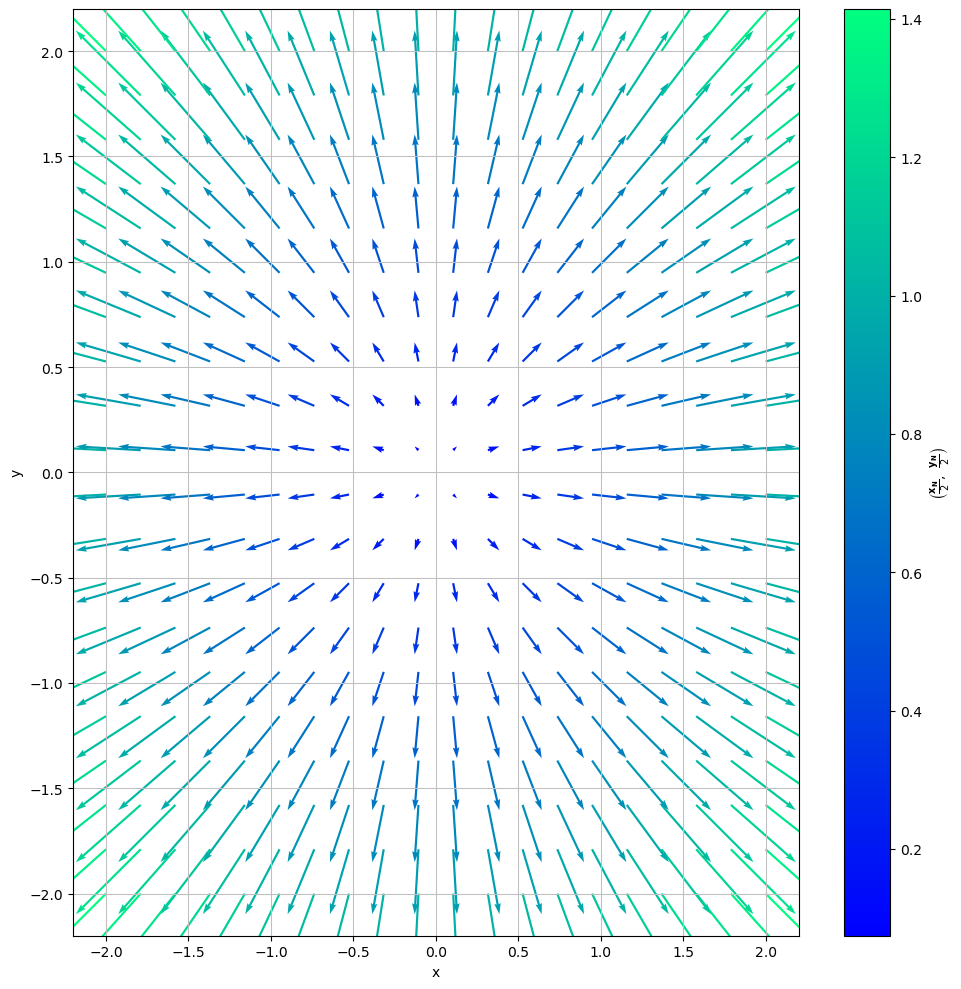

<IPython.core.display.Math object>

In [3]:
N = sv.CoordSys3D("N")
vec_F = (N.x / 2) * N.i + (N.y / 2) * N.j

spb.graphics(
    spb.vector_field_2d(
        vec_F.dot(N.i),
        vec_F.dot(N.j),
        (N.x, -2, +2),
        (N.y, -2, +2),
        quiver_kw={"cmap": "winter", "scale": 10, "headwidth": 3},
        scalar=False,
        normalize=False,
        n=20,
    ),
    size=(10, 10),
    xlabel="x",
    ylabel="y",
    backend=spb.MB,
)

text_div_curl = [
    r"\textrm{Divergence of vector }"
    rf"{sp.latex(vec_F)} &= "
    rf"{sp.latex(sv.divergence(vec_F))} ",
    r"\textrm{Curl of vector }"
    rf"{sp.latex(vec_F)} &="
    rf"{sp.latex(sv.curl(vec_F))} ",
]

print_aligned_latex_equations(*text_div_curl)

#### Exercise 16.1.2 

Draw the radial field $\mathbf{F} (x,y) =
−\dfrac{x}{3}\hat{\mathbf i}
−\dfrac{y}{3}\hat{\mathbf j} $



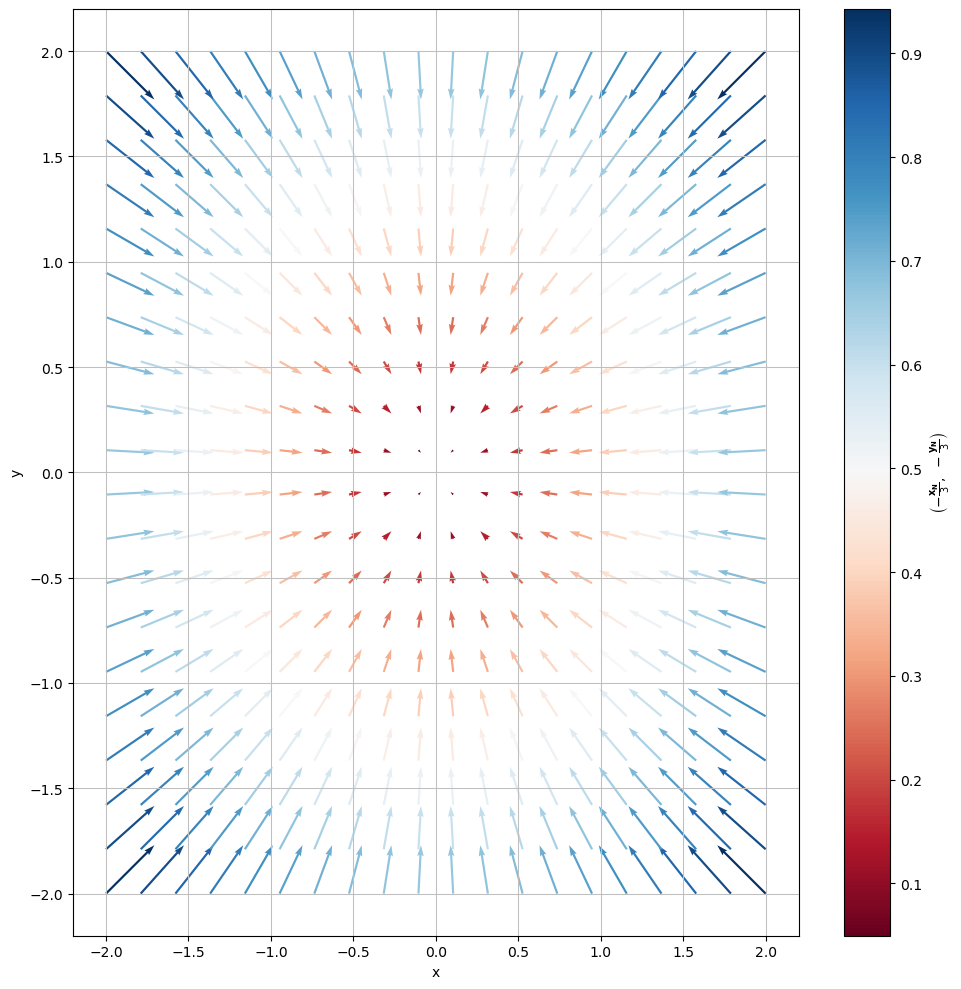

<IPython.core.display.Math object>

In [4]:
N = sv.CoordSys3D("N")
vec_F = (-N.x / 3) * N.i + (-N.y / 3) * N.j

spb.graphics(
    spb.vector_field_2d(
        vec_F.dot(N.i),
        vec_F.dot(N.j),
        (N.x, -2, +2),
        (N.y, -2, +2),
        quiver_kw={"cmap": "RdBu", "scale": 10, "headwidth": 3},
        scalar=False,
        normalize=False,
        n=20,
    ),
    size=(10, 10),
    xlabel="x",
    ylabel="y",
    backend=spb.MB,
)

text_div_curl = [
    r"\textrm{Divergence of vector }"
    rf"{sp.latex(vec_F)} &= "
    rf"{sp.latex(sv.divergence(vec_F))} ",
    r"\textrm{Curl of vector }"
    rf"{sp.latex(vec_F)} &="
    rf"{sp.latex(sv.curl(vec_F))} ",
]

print_aligned_latex_equations(*text_div_curl)

#### Example 16.1.3 Drawing a Rotational Vector Field

Sketch the vector field $\mathbf{F} (x,y) = 
    y \hat{\mathbf i}+(-x\hat{\mathbf j})$

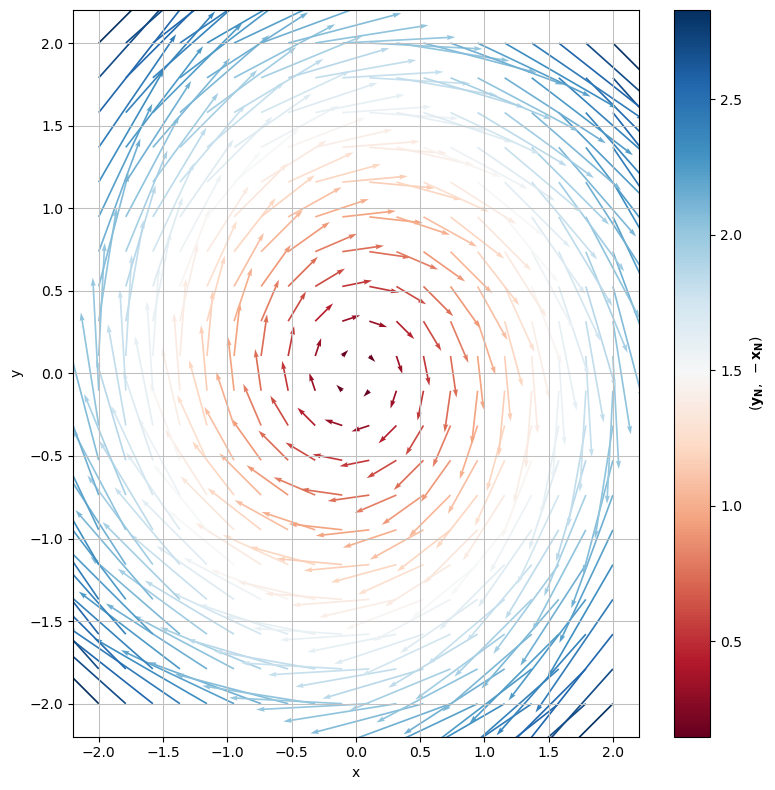

<IPython.core.display.Math object>

In [5]:
N = sv.CoordSys3D("N")
vec_F = (N.y) * N.i + (-N.x) * N.j

spb.graphics(
    spb.vector_field_2d(
        vec_F.dot(N.i),
        vec_F.dot(N.j),
        (N.x, -2, +2),
        (N.y, -2, +2),
        quiver_kw={"cmap": "RdBu", "scale": 10, "headwidth": 3},
        scalar=False,
        normalize=False,
        n=20,
    ),
    size=(8, 8),
    xlabel="x",
    ylabel="y",
    backend=spb.MB,
)

text_div_curl = [
    r"\textrm{Divergence of vector }"
    rf"{sp.latex(vec_F)} &= "
    rf"{sp.latex(sv.divergence(vec_F))} ",
    r"\textrm{Curl of vector }"
    rf"{sp.latex(vec_F)} &="
    rf"{sp.latex(sv.curl(vec_F))} ",
]
print_aligned_latex_equations(*text_div_curl)

#### Example 16.1.4 Sketching a  Vector Field

Sketch the vector field $\mathbf{F} (x,y) = 
    \dfrac{y}{x^2+y^2}\hat{\mathbf i} 
-\dfrac{x}{x^2+y^2}\hat{\mathbf j}$

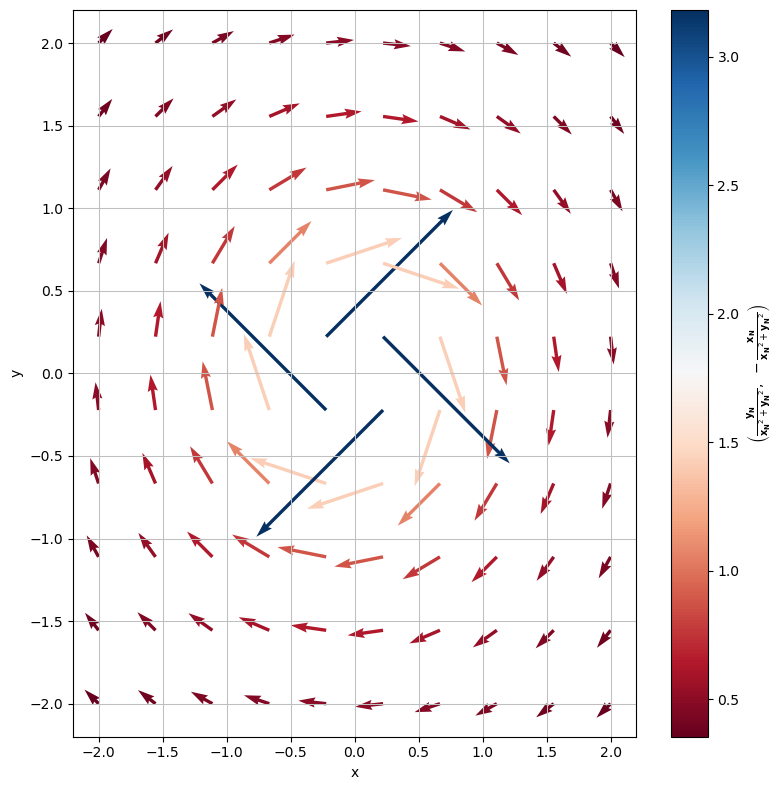

<IPython.core.display.Math object>

In [6]:
N = sv.CoordSys3D("N")
vec_F = (N.y / (N.x**2 + N.y**2)) * N.i - (N.x / (N.x**2 + N.y**2)) * N.j

spb.graphics(
    spb.vector_field_2d(
        vec_F.dot(N.i),
        vec_F.dot(N.j),
        (N.x, -2, +2),
        (N.y, -2, +2),
        quiver_kw={"cmap": "RdBu", "scale": 10, "headwidth": 3},
        scalar=False,
        normalize=False,
        n=10,
    ),
    size=(8, 8),
    xlabel="x",
    ylabel="y",
    backend=spb.MB,
)

text_div_curl = [
    r"\textrm{Divergence of vector }"
    rf"{sp.latex(vec_F)} &= "
    rf"{sp.latex(sv.divergence(vec_F))} ",
    r"\textrm{Curl of vector }"
    rf"{sp.latex(vec_F)} &="
    rf"{sp.latex(sv.curl(vec_F))} ",
    r"\textrm{Magnitude of vector }"
    rf"{sp.latex(vec_F)} &= "
    rf"{sp.latex(vec_F.magnitude().simplify())} ",
]

print_aligned_latex_equations(*text_div_curl)

#### Exercise 16.1.4 Sketching a  Vector Field

Sketch the vector field $\mathbf{F} (x,y) = 
    {-2 y}\hat{\mathbf i} + {2 x}\hat{\mathbf j}$ Is the vector field radial, 
rotational, or neither?

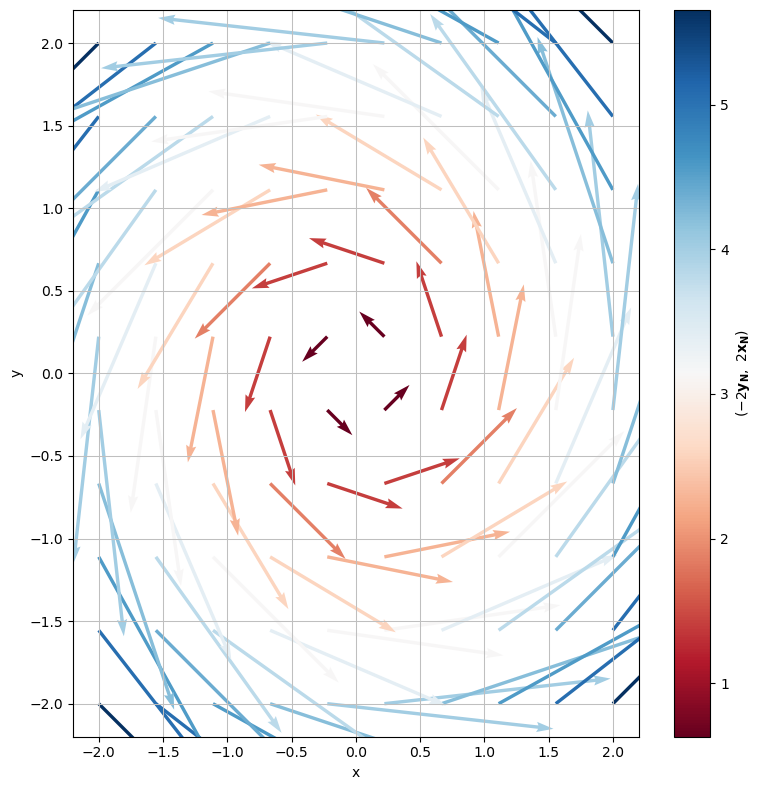

<IPython.core.display.Math object>

In [7]:
N = sv.CoordSys3D("N")
vec_F = (-2 * N.y) * N.i + (2 * N.x) * N.j

spb.graphics(
    spb.vector_field_2d(
        vec_F.dot(N.i),
        vec_F.dot(N.j),
        (N.x, -2, +2),
        (N.y, -2, +2),
        quiver_kw={"cmap": "RdBu", "scale": 10, "headwidth": 3},
        scalar=False,
        normalize=False,
        n=10,
    ),
    size=(8, 8),
    xlabel="x",
    ylabel="y",
    backend=spb.MB,
)

text_div_curl = [
    r"\textrm{Divergence of vector }"
    rf"{sp.latex(vec_F)} &= "
    rf"{sp.latex(sv.divergence(vec_F))} ",
    r"\textrm{Curl of vector }"
    rf"{sp.latex(vec_F)} &="
    rf"{sp.latex(sv.curl(vec_F))} ",
]

print_aligned_latex_equations(*text_div_curl)

#### Exercise 16.1.5 Velocity of fluid

Sketch the vector field $\mathbf{v} (x,y) = 
    {4 |x|}\hat{\mathbf i} + {1}\hat{\mathbf j}$ 
models the velocity of water on the surface of a river. What is the 
speed of the water at point  (2,3)? Use meters per second as the units.

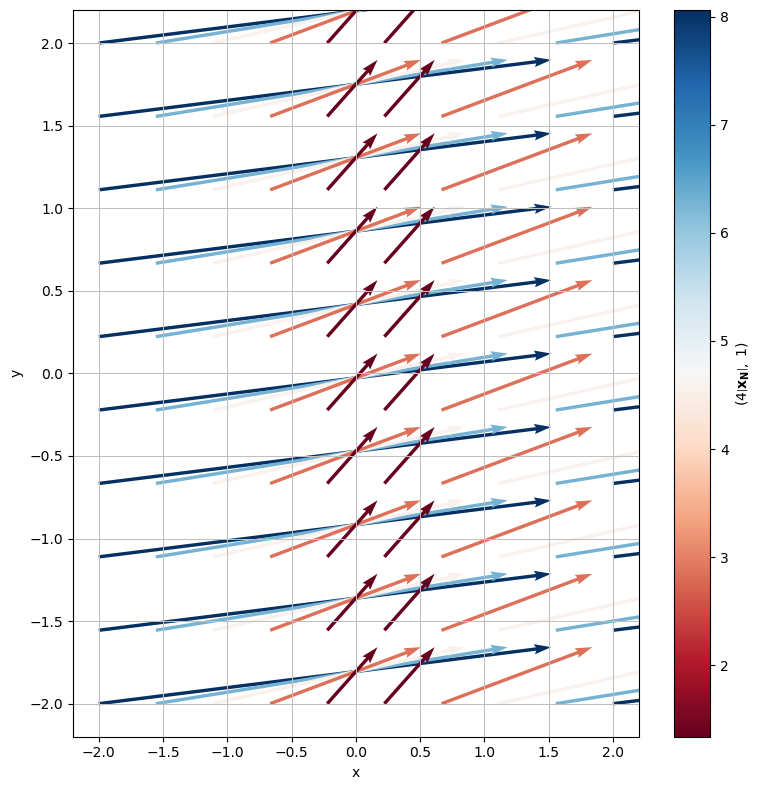

<IPython.core.display.Math object>

In [8]:
N = sv.CoordSys3D("N")
x, y = sp.symbols("x, y", real=True)

vec_v = (4 * sp.Abs(N.x)) * N.i + N.j

spb.graphics(
    spb.vector_field_2d(
        vec_v.dot(N.i),
        vec_v.dot(N.j),
        (N.x, -2, +2),
        (N.y, -2, +2),
        quiver_kw={"cmap": "RdBu", "scale": 10, "headwidth": 3},
        scalar=False,
        normalize=False,
        n=10,
    ),
    size=(8, 8),
    xlabel="x",
    ylabel="y",
    backend=spb.MB,
)


text_div_curl = [
    r"\textrm{Divergence of vector }"
    rf"{sp.latex(vec_v)} &= "
    rf"{sp.latex(sv.divergence(vec_v))} ",
    r"\textrm{Curl of vector }"
    rf"{sp.latex(vec_v)} &="
    rf"{sp.latex(sv.curl(vec_v))} ",
    r"\textrm{speed at (2,3)} &="
    rf"{sp.latex(vec_v.subs(N.x, 2).subs(N.y,3).magnitude())} ",
]

print_aligned_latex_equations(*text_div_curl)

### Drawing a Vector Field 3-D

#### Example  16.1.7 Sketching a Vector Field in Three Dimensions

Describe vector field $ \mathbf F = 
    \hat{\mathbf i} + \hat{\mathbf j} + z \hat{\mathbf k} $

In [9]:
N = sv.CoordSys3D("N")
vec_F = N.i + N.j + N.z * N.k

spb.graphics(
    spb.vector_field_3d(
        vec_F.dot(N.i),
        vec_F.dot(N.j),
        vec_F.dot(N.k),
        (N.x, -2, +2),
        (N.y, -2, +2),
        (N.z, -2, +2),
        quiver_kw={"scale": 0.2, "line_width": 0.1, "head_size": 2},
        #  quiver_kw={"cmap": "RdBu"},
        scalar=False,
        normalize=False,
        n=8,
    ),
    # size=(8, 8),
    xlabel="x",
    ylabel="y",
    backend=spb.KB,
)


text_div_curl = [
    r"\textrm{Divergence of vector }"
    rf"{sp.latex(vec_F)} &= "
    rf"{sp.latex(sv.divergence(vec_F))} ",
    r"\textrm{Curl of vector }"
    rf"{sp.latex(vec_F)} &="
    rf"{sp.latex(sv.curl(vec_F))} ",
]

print_aligned_latex_equations(*text_div_curl)

Output()

<IPython.core.display.Math object>


## Gradient 

In vector calculus, the gradient is a vector operator that operates on 
a scalar field to produce a vector field. It's denoted by the symbol 
∇ (nabla), and it is often referred to as "del" or "nabla."

The gradient of a scalar field $f(x, y, z)$ in three-dimensional Cartesian coordinates is defined as follows:

$$ \nabla f = \frac{\partial f}{\partial x} \mathbf{i} + \frac{\partial f}{\partial y} \mathbf{j} + \frac{\partial f}{\partial z} \mathbf{k} $$

Here,
- $\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y}$, and $\frac{\partial f}{\partial z}$ are the partial derivatives of $f$ with respect to $x$, $y$, and $z$ respectively.
- $\mathbf{i}$, $\mathbf{j}$, and $\mathbf{k}$ are the unit vectors along the x, y, and z axes respectively.

The gradient gives you the direction and magnitude of the steepest increase of the scalar field at a given point. The direction of the gradient vector is the direction of the greatest rate of increase of the scalar field, and its magnitude represents the steepness of the increase.

For example, in physics and engineering: 
- the gradient of a scalar field representing temperature gives the direction of the steepest increase of temperature, and the magnitude of the gradient indicates how fast the temperature is changing in that direction. 

The concept of the gradient is fundamental in fields like physics, engineering, computer science, and more, especially in the context of vector calculus.

## Non - Cartesian coordinates

# Cylindrical

In [10]:
r, phi = sp.symbols("r, phi", real=True)

N = sv.CoordSys3D("N")
C = N.orient_new_axis("C", phi, N.k, vector_names=("r", "p", "z"))
display(C.base_vectors(), C.base_scalars())

C.r + C.p + C.z

(C.r, C.p, C.z)

(C.x, C.y, C.z)

C.r + C.p + C.z

## 2.1 Scalar Product

In [11]:
N = sv.CoordSys3D("N")
A, B = [sp.symbols(rf"{ch}_x:z", real=True) for ch in ["A", "B"]]
vec_A = A[0] * N.i + A[1] * N.j + A[2] * N.k
vec_B = B[0] * N.i + B[1] * N.j + B[2] * N.k
vec_A.dot(vec_B)

A_x*B_x + A_y*B_y + A_z*B_z

In [12]:
# Code example from text
N = sv.CoordSys3D("N")
vec_A, vec_B = 5 * N.i - 2 * N.j + 4 * N.k, 3 * N.i + 1 * N.j + 7 * N.k
cos_angle = angle_between_two_vectors(N, vec_A, vec_B)
assert round(math.degrees(sp.acos(cos_angle)), 1), 37.3

## Cross Product

In [13]:
N = sv.CoordSys3D("N")
vec_A, vec_B = create_vectors(N, "A", "B")
vec_A.cross(vec_B)

(A_y*B_z - A_z*B_y)*N.i + (-A_x*B_z + A_z*B_x)*N.j + (A_x*B_y - A_y*B_x)*N.k

## 2.3 Scalar Triple Product

In [14]:
N = sv.CoordSys3D("N")
vec_A, vec_B, vec_C = create_vectors(N, "A", "B", "C")
vec_A.dot(vec_B.cross(vec_C))

A_x*(B_y*C_z - B_z*C_y) + A_y*(-B_x*C_z + B_z*C_x) + A_z*(B_x*C_y - B_y*C_x)

## 2.3 Triple Scalar Product

$$    \mathbf{a} \times (\mathbf{b} \times \mathbf{c}) = 
    \mathbf{b}(\mathbf{a}
        \cdot \mathbf{c}) - \mathbf{c}(\mathbf{a} \cdot \mathbf{b})
$$

In [15]:
N = sv.CoordSys3D("N")
vec_A, vec_B, vec_C = create_vectors(N, "A", "B", "C")
vtp = vec_A.cross(vec_B.cross(vec_C)).expand()
display(vtp)
simplified_vtp = (vec_B * (vec_A.dot(vec_C)) - vec_C * (vec_A.dot(vec_B))).expand()
assert vtp == simplified_vtp

(A_y*B_x*C_y - A_y*B_y*C_x + A_z*B_x*C_z - A_z*B_z*C_x)*N.i + (-A_x*B_x*C_y + A_x*B_y*C_x + A_z*B_y*C_z - A_z*B_z*C_y)*N.j + (-A_x*B_x*C_z + A_x*B_z*C_x - A_y*B_y*C_z + A_y*B_z*C_y)*N.k

In [16]:
N = sv.CoordSys3D("N")
vec_A, vec_B = create_vectors(N, "A", "B")
vec_A.cross(vec_B)

(A_y*B_z - A_z*B_y)*N.i + (-A_x*B_z + A_z*B_x)*N.j + (A_x*B_y - A_y*B_x)*N.k

## 2.3 Scalar Triple Product

In [17]:
N = sv.CoordSys3D("N")
vec_A, vec_B, vec_C = create_vectors(N, "A", "B", "C")
vec_A.dot(vec_B.cross(vec_C))

A_x*(B_y*C_z - B_z*C_y) + A_y*(-B_x*C_z + B_z*C_x) + A_z*(B_x*C_y - B_y*C_x)

## 2.4 Triple Vector Product

$$    \mathbf{a} \times (\mathbf{b} \times \mathbf{c}) = 
    \mathbf{b}(\mathbf{a}
        \cdot \mathbf{c}) - \mathbf{c}(\mathbf{a} \cdot \mathbf{b})
$$

In [18]:
N = sv.CoordSys3D("N")
vec_A, vec_B, vec_C = create_vectors(N, "A", "B", "C")
vtp = vec_A.cross(vec_B.cross(vec_C)).expand()
display(vtp)
simplified_vtp = (vec_B * (vec_A.dot(vec_C)) - vec_C * (vec_A.dot(vec_B))).expand()
assert vtp == simplified_vtp

(A_y*B_x*C_y - A_y*B_y*C_x + A_z*B_x*C_z - A_z*B_z*C_x)*N.i + (-A_x*B_x*C_y + A_x*B_y*C_x + A_z*B_y*C_z - A_z*B_z*C_y)*N.j + (-A_x*B_x*C_z + A_x*B_z*C_x - A_y*B_y*C_z + A_y*B_z*C_y)*N.k

## 2.5 Partial Derivatives

In [19]:
x, y = sp.symbols("x, y", real=True)
f = 6 * x**2 * y + 3 * x + 5 * x * y + 10
z = f

In [20]:
x, y = sp.symbols("x, y", real=True)
f = 6 * x**2 * y + 3 * x + 5 * x * y + 10

a, b, d = sp.symbols("a b d", real=True)

spb.graphics(
    spb.surface(
        f,
        (x, -3, +3),
        (y, -3, +3),
        wireframe=True,
        wf_n1=20,
        wf_n2=20,
        use_cm=True,
    ),
    aspect=dict(x=1.0, y=1.0, z=1.5),
    backend=spb.PB,
)

In [21]:
fx = sp.diff(f, x)
fy = sp.diff(f, y)
fxx = sp.diff(f, x, x)
fyy = sp.diff(f, y, y)
fxy = sp.diff(f, x, y)
fyx = sp.diff(f, y, x)

print_aligned_latex_equations(
    rf"z=f(x,y) &= {sp.latex(f)}",
    rf"f_{{x}} &= {sp.latex(fx)}",
    rf"f_{{y}} &= {sp.latex(fy)}",
    rf"f_{{xx}} &= {sp.latex(fxx)}",
    rf"f_{{yy}} &= {sp.latex(fyy)}",
    rf"f_{{xy}} &= {sp.latex(fxy)}",
    rf"f_{{yx}} &= {sp.latex(fyx)}",
)

<IPython.core.display.Math object>

Given $z = f(x, y), x = g(u), y = h(v)$ Chain rule for partial derivatives:

\begin{align*}
    z &= f(x, y), x = g(u), y = h(v) \\ 
    \frac{\partial z }{\partial u} &= \frac{\partial z }{\partial x } \frac{\partial x }{\partial u } + \frac{\partial  z}{\partial y } \frac{\partial y}{\partial u}  \\
    \frac{\partial z }{\partial v} &= \frac{\partial z }{\partial x } \frac{\partial x }{\partial v } + \frac{\partial  z}{\partial y } \frac{\partial y}{\partial v}
\end{align*}

## 2.6 Vectors and Derivatives

Given $f(x, y), x = g(t), y = h(t)$ Chain rule for derivatives:

\begin{align*}
    \frac{d f }{d t} &= \frac{d z }{d x } \frac{d x }{d t } + \frac{d  z}{d y } \frac{d y}{d t}  \\
\end{align*}


## 2.7 Nabla -the del operator

$$
    \nabla = 
        \mathbf {\imath}  \frac{\partial}{\partial x}
        + \mathbf {\jmath} \frac{\partial}{\partial y}
        + \mathbf {\hat k} \frac{\partial}{\partial x}
$$

In [22]:
N = sv.CoordSys3D("N")
nabla = sv.Del()

## 2.8 Gradient

The gradient of a scalar function (or field) is a vector-valued function 
directed toward the direction of fastest increase of the function and 
with a magnitude equal to the fastest increase in that direction. 
It is denoted with the $\nabla$ symbol. The gradient is a 
__directional derivative__.

If $\psi(x,y,z)$ is a scalar function then
$$ 
\operatorname{grad} \psi = \nabla \psi(x,y,z) =
        \mathbf {\imath}  \frac{\partial \psi(x,y,z)}{\partial x}
        + \mathbf {\jmath} \frac{\partial \psi(x,y,z)}{\partial y}
        + \mathbf {\hat k} \frac{\partial \psi(x,y,z)}{\partial x}
$$

The gradient of a scalar field is a useful tool for many different applications, including:

* Physics: The gradient of the electric potential is the electric field. 
The gradient of the gravitational potential is the force of gravity.

* Engineering: The gradient of the pressure field is the force of fluid 
flow. The gradient of the temperature field is the heat flux.

* Computer graphics: The gradient of the image intensity is used for 
edge detection and other image processing tasks.

In [23]:
psi = 5 * N.x + 2 * N.y
grad_psi = sv.gradient(psi)
grad_psi

5*N.i + 2*N.j

In [24]:
grad_psi.components, N.base_vectors()

({N.i: 5, N.j: 2}, (N.i, N.j, N.k))

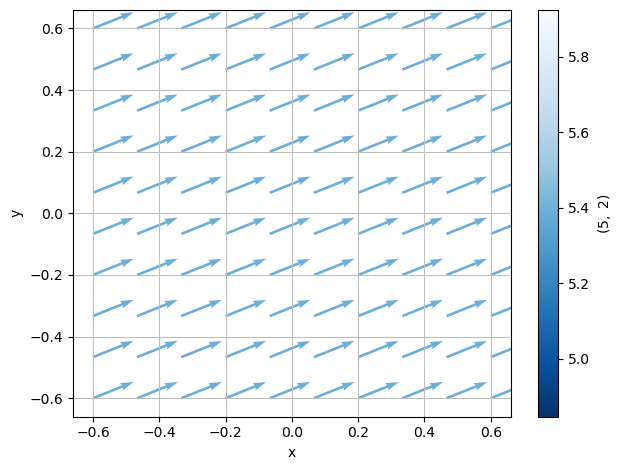

In [25]:
spb.graphics(
    spb.vector_field_2d(
        5,
        2,
        (N.x, -0.6, +0.6),
        (N.y, -0.6, +0.6),
        quiver_kw={"cmap": "Blues_r", "scale": 10, "headwidth": 3},
        scalar=False,
        normalize=True,
        n=10,
    ),
    xlabel="x",
    ylabel="y",
)

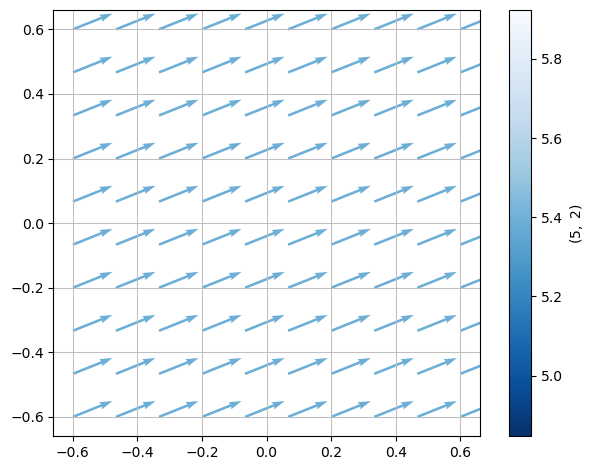

In [26]:
spb.plot_vector(
    [5, 2],
    (N.x, -0.6, +0.6),
    (N.y, -0.6, +0.6),
    quiver_kw={"cmap": "Blues_r", "scale": 10, "headwidth": 3},
    scalar=False,
    normalize=True,
    n=10,
)

In [27]:
N = sv.CoordSys3D("N")
nabla = sv.Del()

In [28]:
vec_A = sp.sin(PI * N.x) * N.i
vec_A

(sin(N.x*pi))*N.i

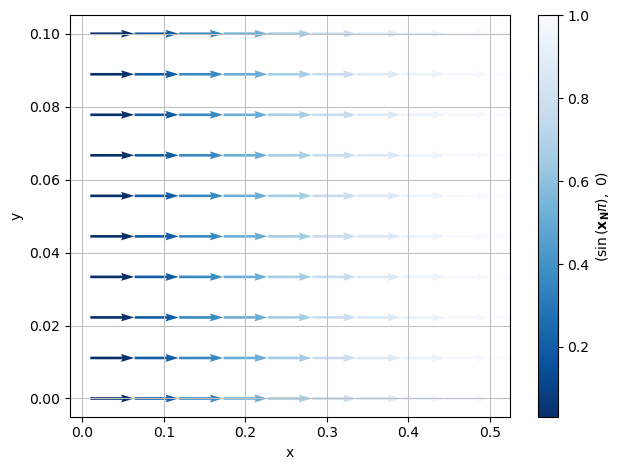

In [29]:
spb.graphics(
    spb.vector_field_2d(
        vec_A.dot(N.i),
        vec_A.dot(N.j),
        (N.x, +0.01, +0.5),
        (N.y, 0.0, +0.1),
        quiver_kw={"cmap": "Blues_r", "scale": 10, "headwidth": 3},
        scalar=False,
        normalize=True,
        n=10,
    ),
    xlabel="x",
    ylabel="y",
)

## DIV

In [30]:
nabla.dot(vec_A).doit()

pi*cos(N.x*pi)

In [31]:
a_r, b_phi, c_theta = sp.symbols("a_r, b_phi , c_theta")

nabla = sv.Del()

N = sv.CoordSys3D("N")

S = sv.CoordSys3D(
    "S",
    parent=N,
    transformation="spherical",
)

vec_S = (a_r) * S.i + (b_phi) * S.j + (c_theta) * S.k
display(a_r, b_phi, c_theta)
display(vec_S, type(vec_S))
# print(IPython.utils.text.columnize(dir(S)))

a_r

b_phi

c_theta

a_r*S.i + b_phi*S.j + c_theta*S.k

sympy.vector.vector.VectorAdd

In [32]:
S.transformation_to_parent()

(S.r*sin(S.theta)*cos(S.phi), S.r*sin(S.phi)*sin(S.theta), S.r*cos(S.theta))

In [33]:
sv.express(S.i + S.j, N)

N.i + N.j

 ## 2.12 Problems

### 2.1 Vectors

For vectors  $\mathbf A = 3 \mathbf {\imath} + 2 \mathbf \jmath – \mathbf{\hat k}$
and  $ \mathbf B = \mathbf \jmath + 4$ , find the scalar product  $ \mathbf A \circ \mathbf B$ and the angle between  $ \mathbf A $ and
$ \mathbf B$



In [34]:
N = sv.CoordSys3D("N")
vec_A = 3 * N.i + 2 * N.j - N.k
vec_B = N.j + 4 * N.k
scalar_product = sv.dot(vec_A, vec_B)
cos_angle = angle_between_two_vectors(N, vec_A, vec_B).evalf()
assert round(scalar_product, 2) == -2
assert math.isclose(cos_angle, -0.13, rel_tol=1e-2)
assert round(math.degrees(sp.acos(cos_angle)), 2) == 97.45

### 2.2 Cross Product 

If vector  $ \mathbf J = 2 \imath  –  \jmath + 5 \mathbf{\hat k} $
and  $ \mathbf K = 3 \imath + 2 \jmath + \mathbf{\hat k} $, find the 
vector $ \mathbf L $ that equals the cross product  $ \mathbf J \times \mathbf K $ . 
Also show that  $ \mathbf L $ is perpendicular to both $ \mathbf J $ and to $ \mathbf K $.



In [35]:
N = sv.CoordSys3D("N")
vec_J = 2 * N.i - N.j + 5 * N.k
vec_K = 3 * N.i + 2 * N.j + N.k
vec_L = sv.cross(vec_J, vec_K)
assert vec_L == -11 * N.i + 13 * N.j + 7 * N.k
assert sv.dot(vec_L, vec_J) == 0
assert sv.dot(vec_L, vec_K) == 0
assert vec_L.dot(vec_J) == 0
assert vec_L.dot(vec_K) == 0

### 2.3 Dot Product Formula

Show that $ \mathbf A \circ \mathbf B  = A_x B_x + A_y B_y + A_z B_z = |\mathbf A|\mathbf B|\cos(\theta)$ and that $ | \mathbf A \times \mathbf A | = |\mathbf A||\mathbf A|\sin(\theta)$


In [36]:
N = sv.CoordSys3D("N")
A_x, A_y, A_z = sp.symbols("A_x, A_y, A_z", real=True)
B_x, B_y, B_z = sp.symbols("B_x, B_y, B_z", real=True)
vec_A = A_x * N.i + A_y * N.j + A_z * N.k
vec_B = B_x * N.i + B_y * N.j + B_z * N.k
vec_A.dot(vec_B)

A_x*B_x + A_y*B_y + A_z*B_z

In [37]:
# cosine rule

theta = sp.symbols("theta", real=True)

cosine_rule = sp.Eq(
    ((vec_B - vec_A).magnitude()) ** 2,
    vec_A.magnitude() ** 2
    + vec_B.magnitude() ** 2
    - 2 * vec_A.magnitude() * vec_B.magnitude() * sp.cos(theta),
)

result_cos_theta = sp.solve(cosine_rule, sp.cos(theta))[0].simplify()

result_dot_cos_theta = vec_A.dot(vec_B) / vec_A.magnitude() / vec_B.magnitude()
assert result_cos_theta == result_dot_cos_theta

In [38]:
def cross_product_squared(v: sv.CoordSys3D, u: sv.CoordSys3D) -> sp.Expr:
    """Compute vector product using function cross of sympy.vector

    Args:
        v (sv.CoordSys3D): first vector
        u (sv.CoordSys3D): second vector

    Returns:
        sp.Expr: (v.cross(u))**2
    """
    return (v.cross(u).magnitude() ** 2).expand()


def magnitude_times_magnitude_times_sin_all_squared(
    v: sv.CoordSys3D, u: sv.CoordSys3D, theta: sp.Symbol
) -> sp.Expr:
    """Compute vector product using the sin formula

    Args:
        v (sv.CoordSys3D): first vector
        u (sv.CoordSys3D): second vector
        theta (sp.Symbol): symbol for angle between two vectors

    Returns:
        sp.Expr:  (|v|*|u| * sin(theta))**2
    """
    return (
        (
            (v.magnitude() * u.magnitude()) ** 2
            * (square_of_sine_of_angle_between_vectors(v, u, theta))
        )
        .simplify()
        .expand()
    )

In [39]:
assert (
    cross_product_squared(vec_A, vec_B)
    == magnitude_times_magnitude_times_sin_all_squared(vec_A, vec_B, theta)
    .simplify()
    .expand()
)

### 2.4 Triple Scalar Product

Using the vectors of the previous two problems, find the triple product  
$\mathbf J \circ (\mathbf A \times \mathbf B)$ Compare your answer to 
$( \mathbf J \times \mathbf A) \circ \mathbf B$.


In [40]:
N = sv.CoordSys3D("N")
vec_A = 3 * N.i + 2 * N.j - N.k
vec_B = N.j + 4 * N.k

vec_J = 2 * N.i - N.j + 5 * N.k
vec_K = 3 * N.i + 2 * N.j + N.k

assert vec_J.dot(vec_A.cross(vec_B)) == 45
assert vec_J.cross(vec_A).dot(vec_B) == 45

### 2.5 Vector triple product 

Using the vectors of Problems 1 and 2, find the triple vector product
$ \mathbf J \times ( \mathbf A \times \mathbf B )$
Compare your answer to $( \mathbf J \times \mathbf A ) \times \mathbf B $
  and to  $\mathbf B \times ( \mathbf J \times \mathbf A )$ .

In [41]:
display(vec_J.cross(vec_A.cross(vec_B)))
display((vec_J.cross(vec_A)).cross(vec_B))
display(vec_B.cross(vec_J.cross(vec_B)))

57*N.i + 39*N.j + (-15)*N.k

61*N.i + 36*N.j + (-9)*N.k

34*N.i + (-36)*N.j + 9*N.k

### 2.6 Partial differentiation

For the function $f (x, y) = x^2 + 3y^2 + 2xy + 3x + 5$,
find  $\frac{\partial f}{\partial y}$ and $\frac{\partial f}{\partial y}$.



In [42]:
f = x**2 + 3 * y**2 + 2 * x * y + 3 * x + 5
assert f.diff(x) == 2 * x + 2 * y + 3
assert f.diff(y) == 2 * x + 6 * y

### 2.7 Gradient 

If $\phi = x^2 + y^2$, what is $\nabla \phi$ at the position 
$(x, y) =(3 cm, –2 cm)$ ?



In [43]:
N = sv.CoordSys3D("N")
phi = N.x**2 + N.y**2
assert sv.gradient(phi) == 2 * N.x * N.i + 2 * N.y * N.j
assert sv.gradient(phi).subs(N.x, 3).subs(N.y, -2) == 6 * N.i - 4 * N.j

### 2.8  Divergence

Find the divergence of the vector field given by 
$\mathbf C = 5 x y \imath - 3 x \jmath + 5 z^2 \mathbf{\hat k}$.



In [44]:
N = sv.CoordSys3D("N")
vec_C = 5 * N.x * N.y * N.i - 3 * N.x * N.j + 5 * N.z**2 * N.k
assert sv.divergence(vec_C) == 5 * N.y + 10 * N.z

### 2.9 Curl

What is the curl of the vector field given in the previous problem?

In [45]:
assert sv.curl(vec_C) == (-5 * N.x - 3) * N.k

### 2.10 Laplacian 

Find the Laplacian of the function given in Problem 2.6.

In [46]:
N = sv.CoordSys3D("N")
f = N.x**2 + 3 * N.y**2 + 2 * N.x * N.y + 3 * N.x + 5
nabla = sv.Del()
gradient = nabla.gradient(f).doit()
assert nabla.dot(gradient).doit() == 8
assert laplacian(f) == 8

### 2.11 Mechanics
In mechanics, the work (W) done by a force ($\mathbf F$) acting over a 
displacement ( $\mathbf{d r}$ ) is defined as the scalar product between 
the force and the displacement, so $ \mathbf F \cdot \mathbf{d r}$ . 
How much work is done by the vertically downward force of Earth’s gravity 
($ |\mathbf F| = m g$, where $g$ is the acceleration of gravity) on a car 
with a mass of $1200 kg$ as the car moves $50$ meters down a hill whose 
surface makes an angle of $20^\circ$ below the horizontal?

![](./images/Q02-11.jpg)

In [47]:
E = sv.CoordSys3D("E")

m, g, d, theta = sp.symbols("m, g, d, theta", real=True)
values = {m: 1200, d: 50, g: 9.8, theta: PI / 180 * 20}

vec_d = vector_cos(E, d, PI / 2 - theta, theta)
vec_F = m * g * E.i
display(vec_d.dot(vec_F))
display(vec_d.dot(vec_F).subs(values).evalf())
assert math.isclose(vec_d.dot(vec_F).subs(values).evalf(3), 2.01e5, rel_tol=1e-2)

d*g*m*sin(theta)

201107.844275493

In [48]:
doctest.testmod(verbose=False)

TestResults(failed=0, attempted=61)